In [72]:
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline

In [73]:
# NOTE: I did not include the code required for formatting the dogs/cats images
# Define paths to train, validation, and test data
base_dir = 'cats-and-dogs-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [74]:
# PROBLEM 1 and 2
# These problems are very similar and they build on one another, so I've included their code together.

# Set up generators for train and test/train data, using code from 5.2 notebook
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Define all models here for problems 1 and 2 for clarity
# Define models according to specifications, using code from 5.2 notebook
# Base model from code and compile
base_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
base_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

# Add l1 regularization to penultimate dense node and compile
l1_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Add l1 regularization here with custom l1 value
    Dense(512, activation='relu', kernel_regularizer=regularizers.L1(l1=0.0001)),
    Dense(1, activation='sigmoid')
])
l1_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

# Add l1l2 regularization to penultimate dense node and compile
l1l2_model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Add l1l2 regularization here with custom l1 value and default l2 value
    Dense(512, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.0001)),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
# Fit all models using these settings
# The 5.2 notebook trains the base model with 30 epochs but for comparison, I am setting them all to 15
steps_epoch = 100
epochs = 15
steps_val = 50

In [76]:
# Fit base model
base_history = base_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)
# Fit l1 model
l1_history = l1_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)
# Fit l2 model
l1l2_history = l1l2_model.fit(train_generator, steps_per_epoch=steps_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=steps_val)

Epoch 1/15
100/100 [==============================] - 34s 341ms/step - loss: 0.6912 - acc: 0.5440 - val_loss: 0.6803 - val_acc: 0.5020
Epoch 2/15
100/100 [==============================] - 34s 336ms/step - loss: 0.6571 - acc: 0.6085 - val_loss: 0.8358 - val_acc: 0.5110
Epoch 3/15
100/100 [==============================] - 34s 337ms/step - loss: 0.6067 - acc: 0.6775 - val_loss: 0.6134 - val_acc: 0.6580
Epoch 4/15
100/100 [==============================] - 34s 343ms/step - loss: 0.5636 - acc: 0.7175 - val_loss: 0.6138 - val_acc: 0.6600
Epoch 5/15
100/100 [==============================] - 36s 359ms/step - loss: 0.5360 - acc: 0.7305 - val_loss: 0.6114 - val_acc: 0.6690
Epoch 6/15
100/100 [==============================] - 35s 351ms/step - loss: 0.5033 - acc: 0.7510 - val_loss: 0.5804 - val_acc: 0.7020
Epoch 7/15
100/100 [==============================] - 35s 348ms/step - loss: 0.4749 - acc: 0.7685 - val_loss: 0.5862 - val_acc: 0.6960
Epoch 8/15
100/100 [==============================] - 3

In [77]:
# Save models for later
base_model.save('catdog_base', save_format='tf')
l1_model.save('catdog_l1', save_format='tf')
l1l2_model.save('catdog_l1l2', save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: catdog_base/assets
INFO:tensorflow:Assets written to: catdog_l1/assets
INFO:tensorflow:Assets written to: catdog_l1l2/assets


<Figure size 432x288 with 0 Axes>

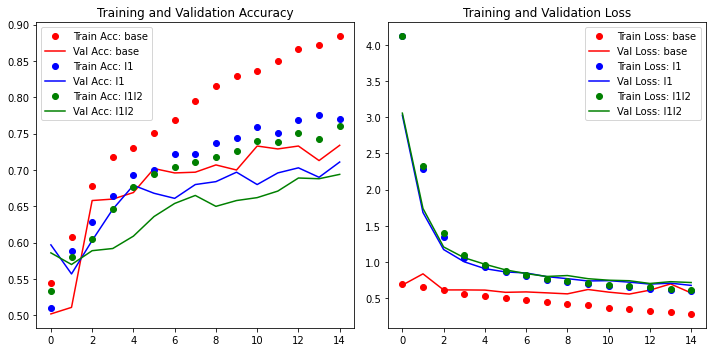

In [78]:
# Clear any previous plots
plt.clf()
# Split into subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
# Store histories data and corresponding config information
histories = [
    {
        'name': 'base',
        'data': base_history,
        'color': 'r'
    },
    {
        'name': 'l1',
        'data': l1_history,
        'color': 'b'
    },
    {
        'name': 'l1l2',
        'data': l1l2_history,
        'color': 'g'
    }
]
# Loop through history dat and plot
for history in histories:
    data = history.get('data')
    color = history.get('color')
    name = history.get('name')

    acc = data.history['acc']
    val_acc = data.history['val_acc']
    loss = data.history['loss']
    val_loss = data.history['val_loss']
    epochs_range = range(len(acc))

    ax1.plot(epochs_range, acc, f'{color}o',label=f'Train Acc: {name}')
    ax1.plot(epochs_range, val_acc, color, label=f'Val Acc: {name}')
    ax1.set_title('Training and Validation Accuracy')

    ax2.plot(epochs_range, loss, f'{color}o', label=f'Train Loss: {name}')
    ax2.plot(epochs_range, val_loss, color, label=f'Val Loss: {name}')
    ax2.set_title('Training and Validation Loss')
ax1.legend()
ax2.legend()
fig.tight_layout()
# Responses for problem 1 and probem 2
# This is an interesting comparison. It appears that the base model (without regularization) performs poorly compared to the other two, as it overfits the data. The other two reduce overfitting significantly. The l1 and l1l2 models perform similarly, but it appears the l1 model has slightly better accuracy and trains slightly faster. The base model diverges to about 90 percent on the training accuracy (and rising) with the appearance of a plataeu at ~75% validation accuracy. l1 improves on this without the appearance of such a divergence, implying that the overfitting has been greatly reduced.

In [92]:
# PROBLEM 3
steps_epoch = 100
epochs = 15
steps_val = 50

callbacks_list = [
    EarlyStopping(
        monitor='acc',
        patience=2
    ),
    ModelCheckpoint(
        filepath='./l1_model_checkpoint',
        monitor='val_loss',
        save_best_only=True
    ),
    TensorBoard(
        log_dir='./tensorboard_logs'
    )
]
callback_history = l1_model.fit(
    train_generator, 
    steps_per_epoch=steps_epoch, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=steps_val,
    callbacks=callbacks_list
)

# Tensorboard images with results
# https://drive.google.com/file/d/1aA5hl28Pph_92d9HTRj_Z8jRTzoI5e37/view?usp=sharing
# https://drive.google.com/file/d/1slNOdhJ3Aql7xi5v4U7ikVrizINi5Ziz/view?usp=sharing

AlreadyExistsError: Another profiler is running.

In [ ]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
histories = [
    {
        'name': 'callback',
        'data': callback_history,
        'color': 'r'
    }
]
for history in histories:
    data = history.get('data')
    color = history.get('color')
    name = history.get('name')
    acc = data.history['acc']
    val_acc = data.history['val_acc']
    loss = data.history['loss']
    val_loss = data.history['val_loss']
    epochs_range = range(len(acc))

    ax1.plot(epochs_range, acc, f'{color}o',label=f'Train Acc: {name}')
    ax1.plot(epochs_range, val_acc, color, label=f'Val Acc: {name}')
    ax1.set_title('Training and Validation Accuracy')

    ax2.plot(epochs_range, loss, f'{color}o', label=f'Train Loss: {name}')
    ax2.plot(epochs_range, val_loss, color, label=f'Val Loss: {name}')
    ax2.set_title('Training and Validation Loss')
ax1.legend()
ax2.legend()
fig.tight_layout()
# This figure

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
for i, (x, y) in enumerate(train_generator):
    *images, = x
    for image in images:
        plt.imshow(image)
        plt.figure()
    break

In [ ]:
# PROBLEM 5
# Load conv base and extract features, according to notebook 5.3

conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False

base_dir = 'cats-and-dogs-small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [ ]:
chollet_model = models.Sequential()
chollet_model.add(conv_base)
chollet_model.add(layers.Flatten())
chollet_model.add(layers.Dense(256, activation='relu'))
chollet_model.add(layers.Dense(1, activation='sigmoid'))

chollet_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

chollet_history = chollet_model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [ ]:
conv_model = models.Sequential()
conv_model.add(conv_base)
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(256, activation='relu'))
conv_model.add(layers.Dense(1, activation='sigmoid'))

conv_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

conv_history = conv_model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [ ]:
# PROBLEM 6
conv_base_chollet = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base_chollet.trainable = True

set_trainable = False
for l in conv_base_chollet.layers:
    if l.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        l.trainable = True
    else:
        l.trainable = False

chollet_model_2 = models.Sequential()
chollet_model_2.add(conv_base_chollet)
chollet_model_2.add(layers.Flatten())
chollet_model_2.add(layers.Dense(256, activation='relu'))
chollet_model_2.add(layers.Dense(1, activation='sigmoid'))

chollet_model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

chollet_history_2 = chollet_model_2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
conv_base_bryant = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
conv_base_bryant.trainable = True

for l in conv_base_bryant.layers:
    if l.name == 'block4_conv3':
        l.trainable = True
    else:
        l.trainable = False

bryant_model = models.Sequential()
bryant_model.add(conv_base_bryant)
bryant_model.add(layers.Flatten())
bryant_model.add(layers.Dense(256, activation='relu'))
bryant_model.add(layers.Dense(1, activation='sigmoid'))

bryant_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

bryant_history = bryant_model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)